In [ ]:
cd drive/MyDrive/Live_workshops_treinamentos/2022_05_ML_precos_carros

/content/drive/MyDrive/Live_workshops_treinamentos/2022_05_ML_precos_carros


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORAÇÃO DOS DADOS

## ANÁLISES DESCRITIVAS

In [ ]:
df_metadados_limpos_3 = pd.read_csv("df_metadados_limpos_3.csv")

In [ ]:
df_metadados_limpos_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79117 entries, 0 to 79116
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           79117 non-null  int64  
 1   TITULO       79117 non-null  object 
 2   UF           79117 non-null  object 
 3   Ano          79117 non-null  float64
 4   KM           79117 non-null  float64
 5   CAMBIO       79117 non-null  object 
 6   COMBUSTIVEL  79117 non-null  object 
 7   VALOR_LIMPO  79117 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.8+ MB


In [ ]:
df_metadados_limpos_3.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.911700e+04,79117.0,7.911700e+04,79117.0
mean,1.009786e+09,2014.0,4.306150e+06,126150.0
std,3.229385e+07,7.0,1.756322e+08,1650063.0
min,4.733270e+08,1950.0,0.000000e+00,0.0
25%,1.007340e+09,2012.0,3.200000e+04,36900.0
50%,1.020753e+09,2016.0,6.986000e+04,59900.0
75%,1.026599e+09,2019.0,1.130000e+05,95990.0
max,1.028464e+09,2023.0,1.000000e+10,99000000.0


In [ ]:
## ANALISANDO A PROPORÇÃO DOS TIPOS DE COMBUSTIVEL E CAMBIO
#print(df_metadados_limpos_3.COMBUSTIVEL.value_counts(normalize=True,dropna=False),"\n=============\n")
#print(df_metadados_limpos_3.CAMBIO.value_counts(normalize=True,dropna=False))

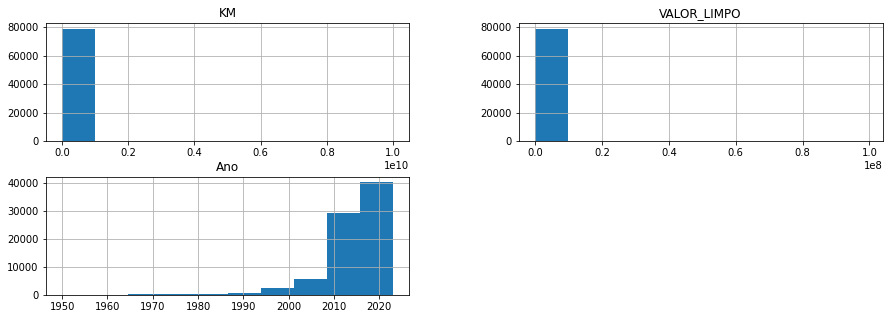

In [ ]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS NUMÉRICOS COM HISTOGRAMA
colunas_numericas = ['KM','VALOR_LIMPO','Ano']
df_metadados_limpos_3.loc[:,colunas_numericas].hist(figsize=(15,5))
plt.show()

KM
VALOR_LIMPO
Ano


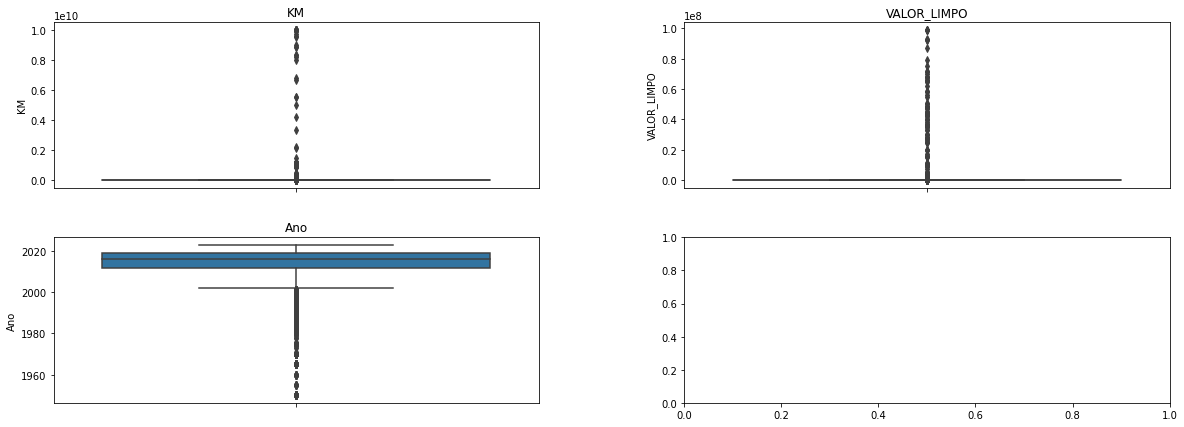

In [ ]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS COM BOXPLOT
#fliers = False
fig, axs = plt.subplots(2,2,figsize=(20,7))
fig.subplots_adjust(hspace = .3, wspace=.3)
axs = axs.ravel()

for i in range(len(axs)-1):
  print(colunas_numericas[i])
  sns.boxplot(y=colunas_numericas[i],data=df_metadados_limpos_3,
              ax=axs[i], showfliers=True)
  axs[i].set_title(colunas_numericas[i])
plt.show()

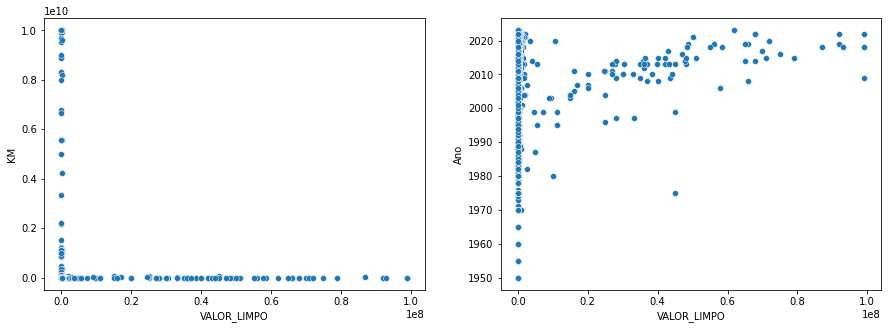

In [ ]:
## ANALISANDO RELAÇÃO ENTRE AS VARIÁVEIS

fig, axs = plt.subplots(1,2,figsize=(15,5))
#fig.subplots_adjust(hspace = .3, wspace=.3)
sns.scatterplot(x='VALOR_LIMPO',y='KM',data=df_metadados_limpos_3,ax=axs[0])
sns.scatterplot(x='VALOR_LIMPO',y='Ano',data=df_metadados_limpos_3,ax=axs[1])
plt.show()

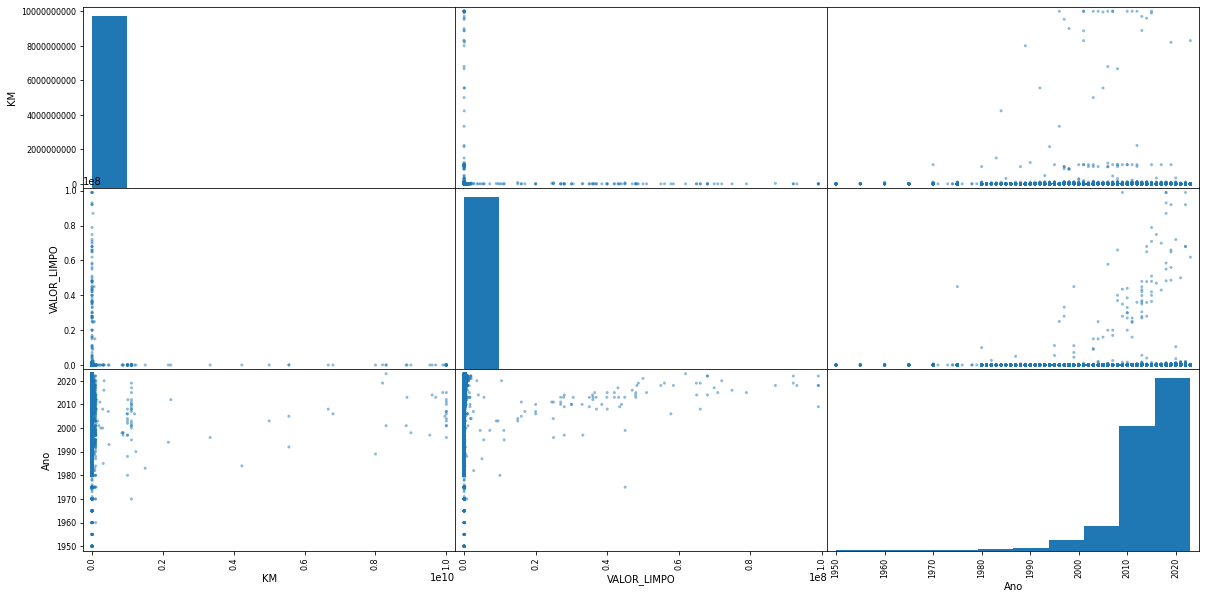

In [ ]:
## OUTRA FORMA DE ANALISAR A DISTRIBUIÇÃO E RELAÇÃO, DE TODAS AS VARIÁVEIS AO MESMO TEMPO
#sns.pairplot(df_metadados_limpos_3[colunas_numericas] ) pairplot não tá rodando no COLAB
pd.plotting.scatter_matrix(df_metadados_limpos_3[colunas_numericas], figsize=(20,10))
plt.show()

## ANALISANDO OS OUTLIER - **VALOR < 5000**
- analisar de forma individual registros que são outliers mais significativos para a coluna **VALOR_LIMPO**

In [ ]:
df_metadados_limpos_3.query("VALOR_LIMPO < 5000 ")

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
26,1028010324,4 mil,ac,2000.0,1688500.0,manual,gasolina,4000.0
152,1027226510,vende se um fiat tempra 96,ac,1996.0,104000.0,manual,gasolina,1500.0
153,1027224897,vendo um kadett,ac,1990.0,0.0,manual,gasolina,2000.0
183,1027058831,vendo um palio,ac,1995.0,4800000.0,manual,gasolina,4000.0
200,1026992775,vendo 6 pneus,ac,2019.0,35906.0,manual,flex,500.0
...,...,...,...,...,...,...,...,...
78787,1007188334,vendo pra vc arrumar ou retirar peças,to,2000.0,0.0,manual,flex,4000.0
78827,1006657354,farol de milha gol rallye ou saveiro cross g6,to,2015.0,157000.0,manual,flex,280.0
78941,1005311730,fiesta 97/98 1.0,to,1997.0,500000.0,manual,gasolina,3800.0
79013,1004166805,monza 1.8,to,1994.0,70000.0,manual,gasolina,3500.0


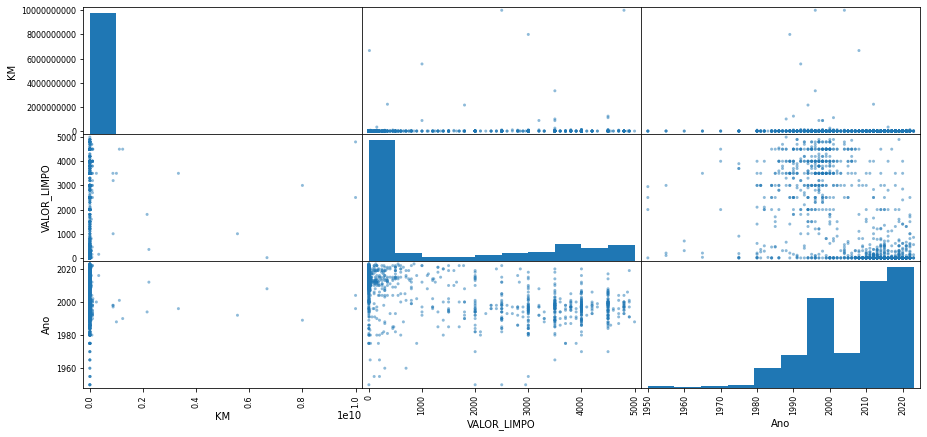

In [ ]:
dados = df_metadados_limpos_3.query("VALOR_LIMPO < 5000")
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

**CONCLUSÃO**
- podemos observar que há muitos registros com valores entre 0 e 500 em VALOR_LIMPO
  - esses registros podem ser diferentes tipos de anúncios como de acessários
  - mesmo que seja automóveis, precisamos da informação de VALOR
- Podemos observar que há um crescimento de acordo com o aumento do valores a partir de 2.000.
  - Podemos ver que há automovéis mais antigos com valores entre 3.000 - 5.000 (célula com *head()*)
- **Portanto, vamos Eliminar registros com *VALOR abaixo de 5.000**


In [ ]:
df_metadados_sem_outlier = df_metadados_limpos_3.query("VALOR_LIMPO > 5000")

In [ ]:
df_metadados_sem_outlier.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.763800e+04,77638.0,7.763800e+04,77638.0
mean,1.009676e+09,2015.0,3.400712e+06,128522.0
std,3.240879e+07,7.0,1.566709e+08,1665615.0
min,4.733270e+08,1950.0,0.000000e+00,5200.0
25%,1.007232e+09,2012.0,3.300000e+04,38000.0
50%,1.020642e+09,2016.0,7.000000e+04,60000.0
75%,1.026599e+09,2019.0,1.130000e+05,97000.0
max,1.028464e+09,2023.0,1.000000e+10,99000000.0


## ANALISANDO OS OUTLIER - **VALOR > 100.000**

In [ ]:
df_metadados_sem_outlier.query("VALOR_LIMPO > 100000").sort_values('VALOR_LIMPO')

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
30751,1024576095,corsa hatch,ms,1997.0,206000.0,manual,gasolina,100009.0
55157,1016613500,renegade 2020/2021 1.8 16v flex longitude 4p a...,rs,2021.0,56049.0,automático,flex,100110.0
33612,979908364,fiat strada 1.4 fire flex endurance cs manual,mg,2021.0,20000.0,manual,flex,100170.0
34287,978021679,fiat strada 1.4 fire flex endurance cs manual,mg,2021.0,20000.0,manual,flex,100170.0
48719,918365531,corolla 2019/2019 1.8 gli upper 16v flex 4p au...,pr,2019.0,50150.0,automático,flex,100180.0
...,...,...,...,...,...,...,...,...
74612,1023544440,vendo um carro corolla,se,2018.0,20000.0,automático,flex,93000000.0
31839,1019838338,hilux srv 2009/2009 automática 4x4,ms,2009.0,400000.0,automático,diesel,99000000.0
71902,1028434272,vendo yaris xls connect com teto solar,se,2022.0,14000.0,automático,flex,99000000.0
5166,1018527699,"honda hr-v ex cvt 2018 automático r$99.000,00",al,2018.0,83.0,automático,flex,99000000.0


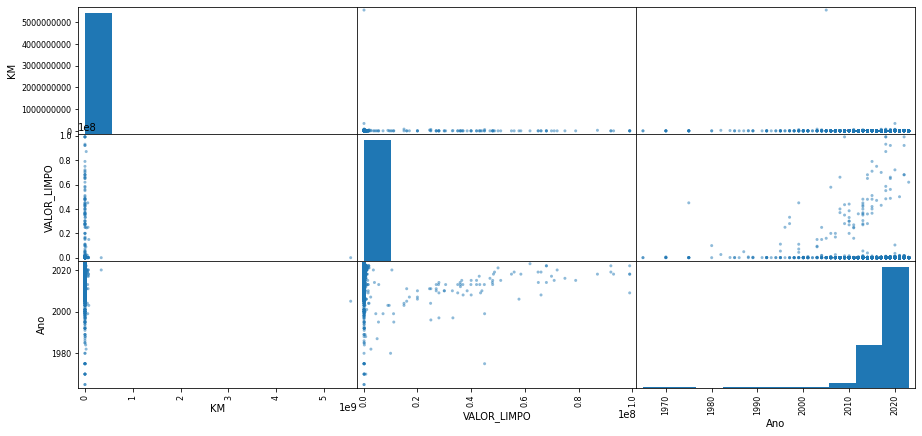

In [ ]:
dados = df_metadados_sem_outlier.query("VALOR_LIMPO > 100000")
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

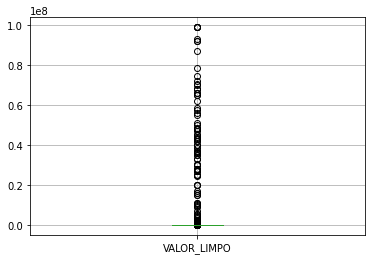

In [ ]:
dados = df_metadados_sem_outlier.query("VALOR_LIMPO > 100000")
dados[['VALOR_LIMPO']].boxplot()
plt.show()

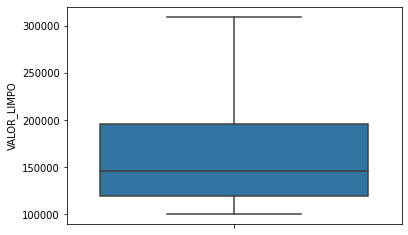

In [ ]:
sns.boxplot(y='VALOR_LIMPO',data=df_metadados_sem_outlier.query("VALOR_LIMPO > 100000"),showfliers=False)

**CONCLUSÃO**
- Eliminar registros com *VALOR* **acima** de 300.000

In [ ]:
df_metadados_sem_outlier = df_metadados_sem_outlier.query("VALOR_LIMPO <= 300000")
df_metadados_sem_outlier.to_csv("df_metadados_sem_outlier.csv",index=False)

In [ ]:
df_metadados_sem_outlier.shape

(76418, 8)

## ANALISANDO OS OUTLIER - KM

In [ ]:
df_metadados_sem_outlier.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.641800e+04,76418.0,7.641800e+04,76418.0
mean,1.009776e+09,2014.0,3.448618e+06,74496.0
std,3.235223e+07,7.0,1.579151e+08,53338.0
min,4.733270e+08,1950.0,0.000000e+00,5200.0
25%,1.007333e+09,2012.0,3.407500e+04,37900.0
50%,1.020720e+09,2016.0,7.000000e+04,59900.0
75%,1.026619e+09,2019.0,1.140000e+05,94990.0
max,1.028464e+09,2023.0,1.000000e+10,300000.0


In [ ]:
df_metadados_sem_outlier.query("KM > 100000").sort_values('KM')

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
60354,1018259120,golf spotline,ro,2011.0,1.000020e+05,manual,flex,49000.0
53563,1027698037,"clio ano 2002, 2003",pi,2003.0,1.000050e+05,manual,gasolina,10000.0
35547,949144896,volkswagen golf highline 1.4 tsi 2017,mg,2017.0,1.000060e+05,automático,flex,109900.0
20828,1028248896,bmw 118i,ma,2010.0,1.000070e+05,automático,gasolina,32000.0
26006,1025921680,carros,mt,2018.0,1.000100e+05,manual,flex,73000.0
...,...,...,...,...,...,...,...,...
33843,1028247139,celta,mg,2007.0,1.000000e+10,manual,flex,14500.0
21030,1028054873,ford ka venda,ma,2011.0,1.000000e+10,manual,flex,12000.0
41337,1025841979,montana 2012 1.4 comp. flex,pa,2012.0,1.000000e+10,manual,flex,38000.0
7611,1027226848,meriva 1.4/ 2010 / flex,am,2010.0,1.000000e+10,manual,flex,7000.0


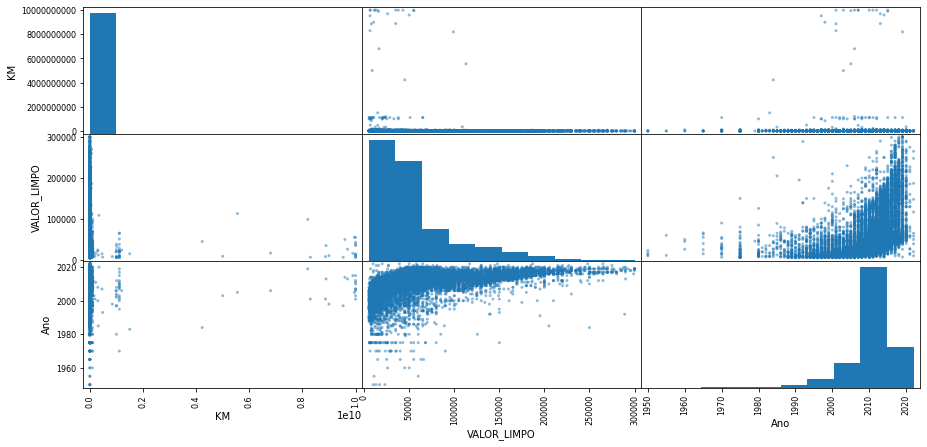

In [ ]:
dados = df_metadados_sem_outlier.query("KM > 100000")
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

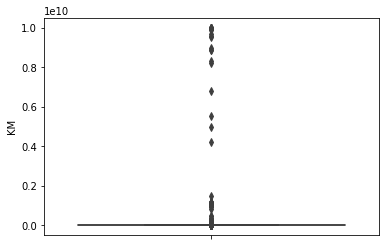

In [ ]:
sns.boxplot(y='KM',data = df_metadados_sem_outlier)

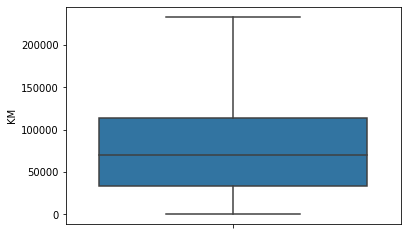

In [ ]:
sns.boxplot(y='KM',data = df_metadados_sem_outlier,showfliers=False)

**CONCLUSÃO**
- Há muitos outliers em KM, sendo que a maior concentração está em KM até ~200.000 KM
  - analisando os boxplot sem outlier, podemos confirmar que os valores até 250.000 km são os mais "normais".
- Utilizar apenas anúncios de carros **seminovo/usados.** 
  - Carros zeros KM geralmente vem com valores informados de parcelas, financiamento, entrada e afins, isso pode enviesar e prejudicar o modelo

- Portanto, vamos eliminar todos veículos com KM 0 e eliminar KM  **utilizando outlier do boxplot (IQR)**

**RETORNAR OUTLIER UTILIZANDO BOXPLOT** 

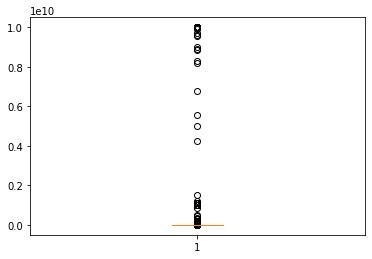

In [ ]:
## GERANDO BOXPLOT E SALVANDO EM UM NOVO OBJETO
boxplot_km = plt.boxplot(x = df_metadados_sem_outlier['KM'])

**ACESSANDO VALORES LIMITES MÁXIMO E MÍNIMO, e OUTLIERS**


In [ ]:
## ACESSANDO VALORES DO BOXPLOT: retorna uma lista com objetos matplotlib
print(boxplot_km['whiskers'])

[<matplotlib.lines.Line2D object at 0x7fafd0d34610>, <matplotlib.lines.Line2D object at 0x7fafd0d343d0>]


In [ ]:
## ACESSANDO VALORES NA LISTA
print(boxplot_km['whiskers'][0].get_ydata()) # limite inferior e 1 QUARTIL
print(boxplot_km['whiskers'][1].get_ydata()) # 3 QUARTIL e limite superior

[34075.     0.]
[114000. 233522.]


In [ ]:
## SALVANDO OUTLIER NA VARIÁVEL
outlier = boxplot_km['whiskers'][1].get_ydata()[1]
outlier

233522.0

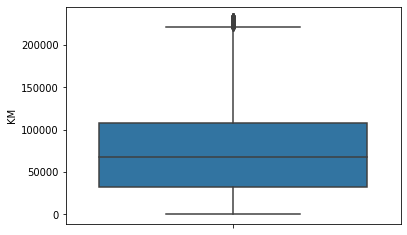

In [ ]:
sns.boxplot(y='KM',data = df_metadados_sem_outlier.query(f"KM <= {outlier}"))
plt.show()

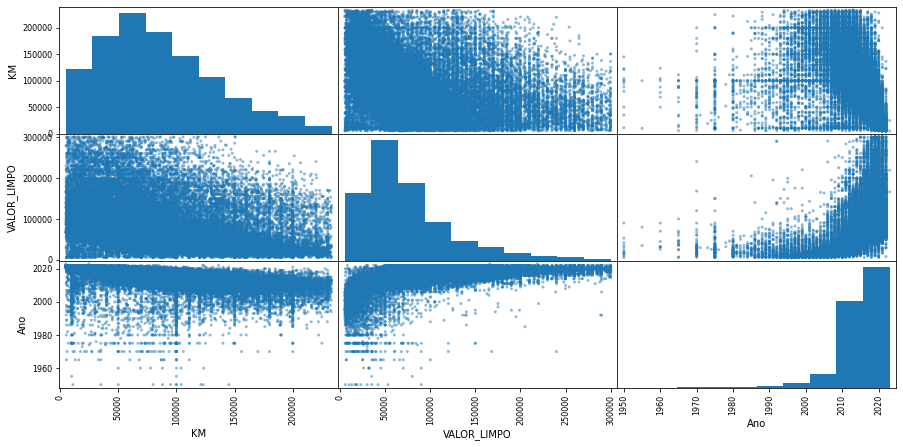

In [ ]:
dados = df_metadados_sem_outlier.query(f"KM > 5000 and KM < {outlier}")
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

In [ ]:
df_metadados_sem_outlier_2 = df_metadados_sem_outlier.query(f"KM > 5000 and KM < {outlier}")
df_metadados_sem_outlier_2.to_csv("df_metadados_sem_outlier_2.csv",index=False)


In [ ]:
df_metadados_sem_outlier_2.shape

(64022, 8)

## ANALISANDO OS OUTLIER - ANO

In [ ]:
df_metadados_sem_outlier_2.query("Ano < 2000")

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
136,1027301892,carro,ac,1994.0,100000.0,manual,álcool,16000.0
204,1026983400,carro,ac,1994.0,100000.0,manual,álcool,16000.0
220,1026928651,vendo esse corsa,ac,1996.0,86000.0,manual,gasolina,5500.0
227,1026905967,gol quadrado pra fazer troca em um gol bola.,ac,1994.0,100000.0,manual,gasolina,10000.0
349,1026061339,corsa chevrolet top,ac,1996.0,158330.0,manual,gasolina,8000.0
...,...,...,...,...,...,...,...,...
78767,1007423909,fiat tempra hlx 1997/97,to,1997.0,172305.0,manual,gasolina,22900.0
78797,1007121315,vendo saveiro quadrada 1.6 motor cht ano 92 do...,to,1992.0,11111.0,manual,gasolina,12500.0
78878,1006143345,meu numero * ligasoes zap *,to,1995.0,150000.0,manual,diesel,75000.0
78921,1005497379,f100,to,1982.0,100000.0,manual,gasolina,29500.0


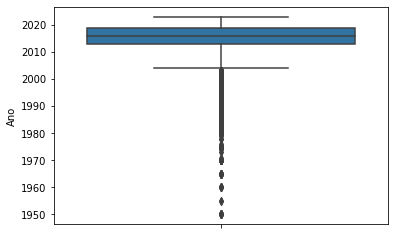

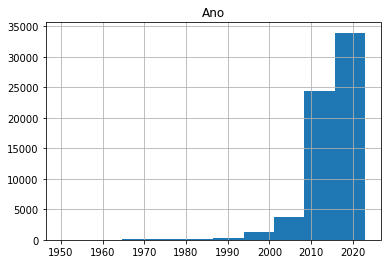

In [ ]:
sns.boxplot(y = 'Ano', data = df_metadados_sem_outlier_2)

df_metadados_sem_outlier_2[['Ano']].hist()
plt.show()

[2013. 2004.]
[2019. 2023.]


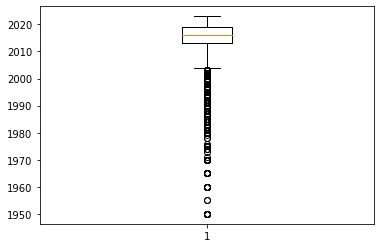

In [ ]:
## GERANDO BOXPLOT E SALVANDO EM UM NOVO OBJETO
boxplot_km = plt.boxplot(x = df_metadados_sem_outlier_2['Ano'])

print(boxplot_km['whiskers'][0].get_ydata()) # limite inferior e 1 QUARTIL
print(boxplot_km['whiskers'][1].get_ydata()) # 3 QUARTIL e limite superior

(61609, 8)


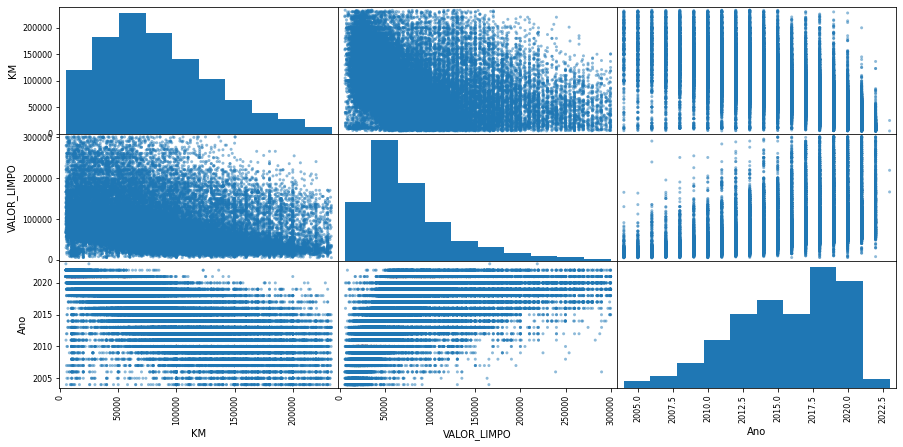

In [ ]:
dados = df_metadados_sem_outlier_2.query(f"Ano >= {boxplot_km['whiskers'][0].get_ydata()[1]}")
print(dados.shape)
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

(62526, 8)


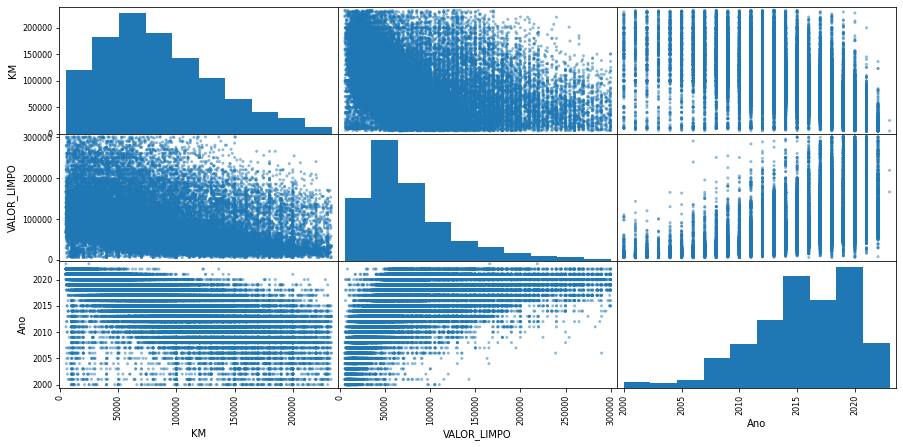

In [ ]:
dados = df_metadados_sem_outlier_2.query(f"Ano >= 2000")
print(dados.shape)
pd.plotting.scatter_matrix(dados[colunas_numericas], figsize=(15,7))
plt.show()

In [ ]:
df_metadados_sem_outlier_3 = df_metadados_sem_outlier_2.query(f"Ano >= 2000")
df_metadados_sem_outlier_3.to_csv('df_metadados_sem_outlier_3.csv',index=False)

## **NORMALIZANDO DADOS COM LOG**

In [ ]:
df_metadados_sem_outlier_3.loc[:,'VALOR_LIMPO_LOG'] = np.log(df_metadados_sem_outlier_3.VALOR_LIMPO)
df_metadados_sem_outlier_3.loc[:,'KM_LOG']  = np.log(df_metadados_sem_outlier_3.KM)
df_metadados_sem_outlier_3.loc[:,'ANO_LOG'] = np.log(df_metadados_sem_outlier_3.Ano)

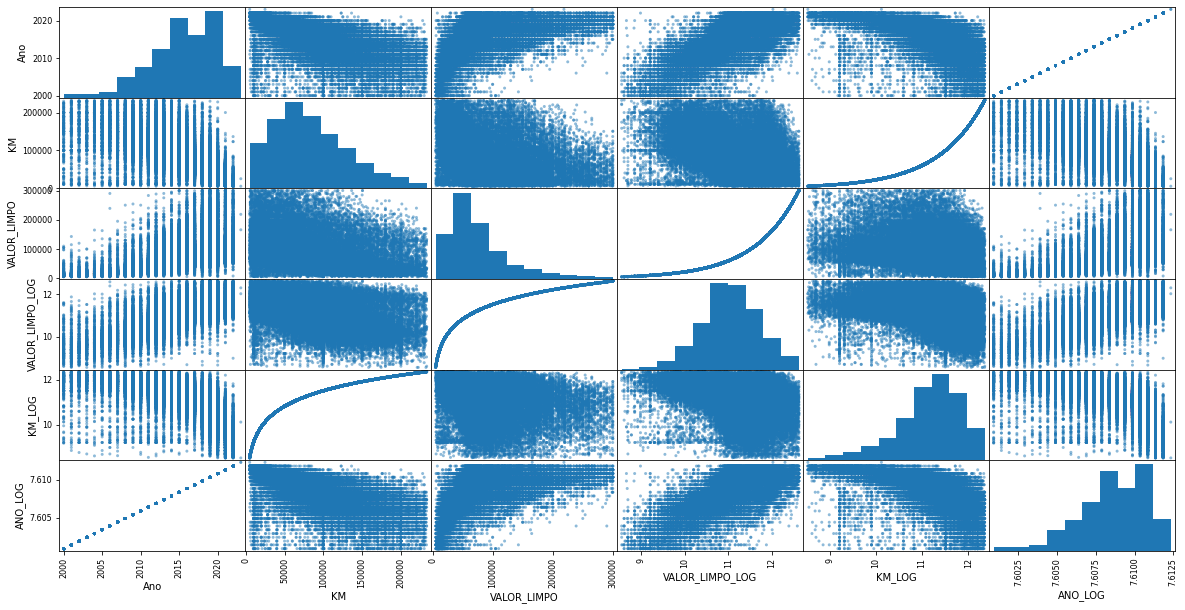

In [ ]:
pd.plotting.scatter_matrix(df_metadados_sem_outlier_3.drop(columns=['ID']), figsize=(20,10))
plt.show()

In [ ]:
df_metadados_sem_outlier_3.to_csv('df_metadados_sem_outlier_3.csv',index=False)

## ANÁLISE VARIÁVEIS DISCRETAS

In [ ]:
df_metadados_sem_outlier_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62526 entries, 0 to 79116
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               62526 non-null  int64  
 1   TITULO           62526 non-null  object 
 2   UF               62526 non-null  object 
 3   Ano              62526 non-null  float64
 4   KM               62526 non-null  float64
 5   CAMBIO           62526 non-null  object 
 6   COMBUSTIVEL      62526 non-null  object 
 7   VALOR_LIMPO      62526 non-null  float64
 8   VALOR_LIMPO_LOG  62526 non-null  float64
 9   KM_LOG           62526 non-null  float64
 10  ANO_LOG          62526 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.7+ MB


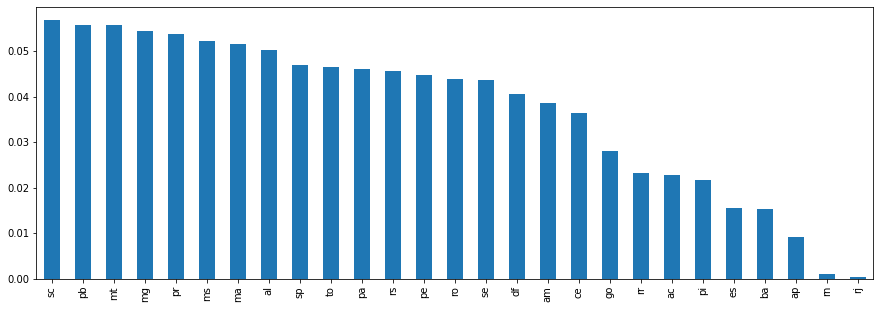

In [ ]:
## ANALISANDO PROPORÇÃO DE ANUNCIOS POR UF
df_metadados_sem_outlier_3.UF.value_counts(normalize=True).plot(kind='bar',figsize=(15,5))

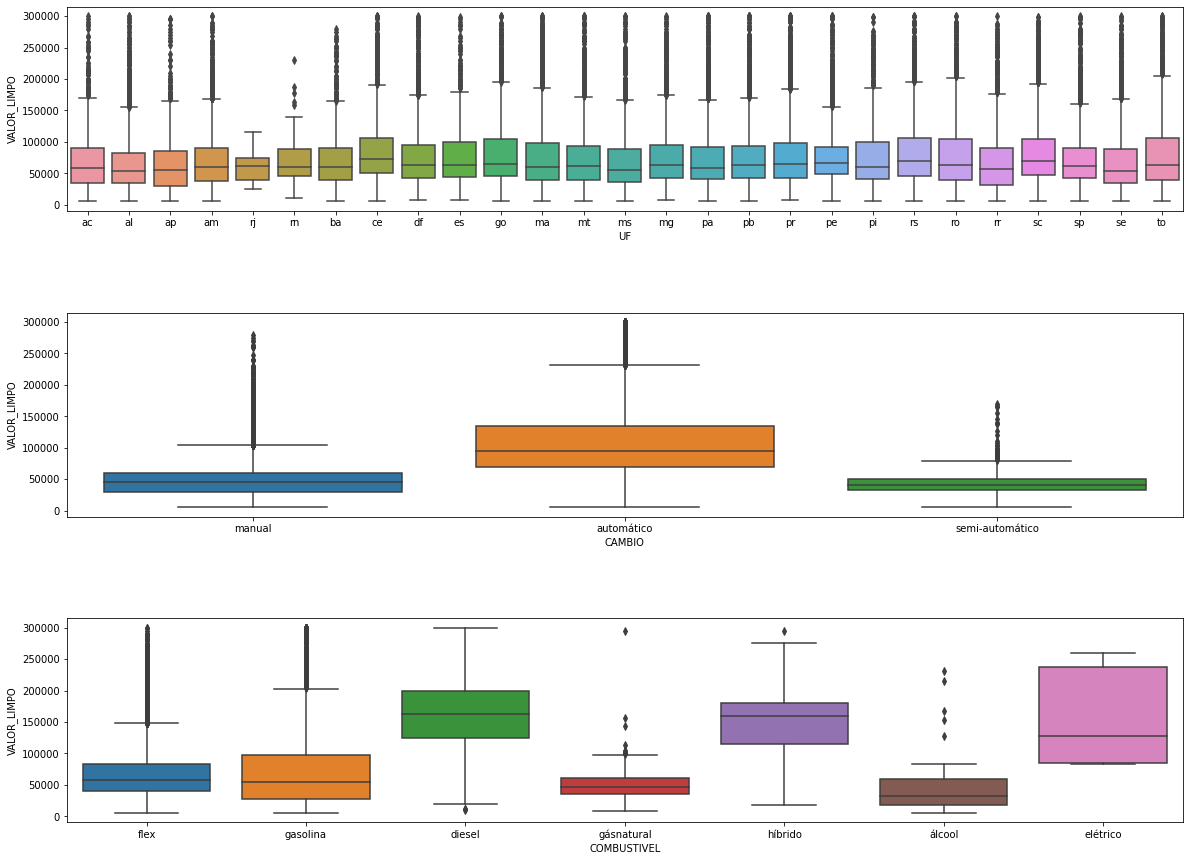

In [ ]:
## ANALISANDO VALORES POR UF, CAMBIO E COMBUSTIVEL
fig, axs = plt.subplots(3,1,figsize=(20,15))
fig.subplots_adjust(hspace = .5, wspace=.3)

sns.boxplot(x = 'UF', y = 'VALOR_LIMPO',data = df_metadados_sem_outlier_3,ax = axs[0])
sns.boxplot(x = 'CAMBIO', y = 'VALOR_LIMPO',data = df_metadados_sem_outlier_3,ax = axs[1])
sns.boxplot(x = 'COMBUSTIVEL', y = 'VALOR_LIMPO',data = df_metadados_sem_outlier_3,ax = axs[2])

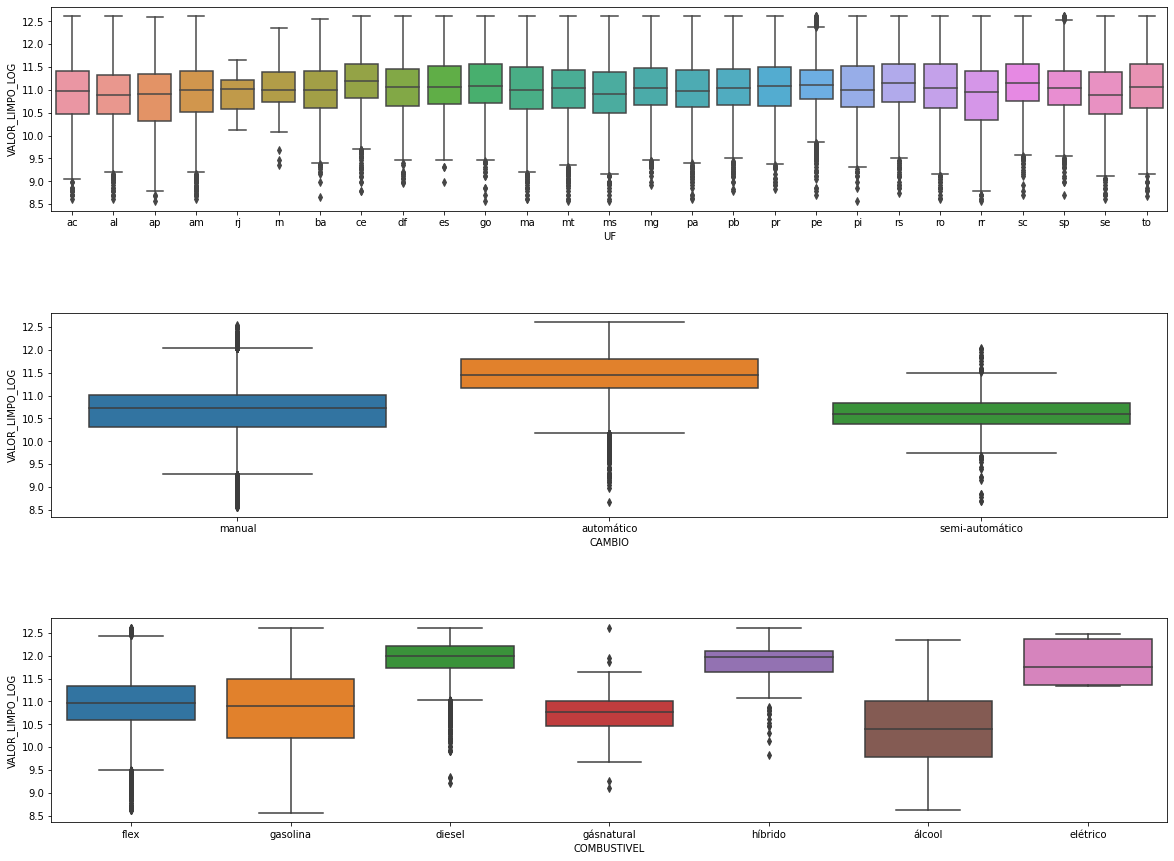

In [ ]:
## ANALISANDO VALORES EM LOG POR UF, CAMBIO E COMBUSTIVEL
fig, axs = plt.subplots(3,1,figsize=(20,15))
fig.subplots_adjust(hspace = .5, wspace=.3)

sns.boxplot(x = 'UF', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[0])
sns.boxplot(x = 'CAMBIO', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[1])
sns.boxplot(x = 'COMBUSTIVEL', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[2])

In [ ]:
#print(df_metadados_sem_outlier_2.Marca.nunique(),"\n")
#df_metadados_sem_outlier_2.Marca.value_counts()[:20].plot(kind='bar',figsize=(15,5))

In [ ]:
#plt.figure(figsize=(20,7))
#top_marcas = df_metadados_sem_outlier_2.Marca.value_counts()[:20].index.tolist()
#top_marcas
#sns.boxplot(x = 'Marca',y = 'VALOR_LIMPO', data = df_metadados_sem_outlier_2.query(f"Marca in {top_marcas} ") )

## TRANSFORMANDO VARIÁVEIS DISCRETAS
- Modelos de ML não aceitam texto (raras algumas exceções), precisamos transformar texto em número utilizando técnicas de **LABEL ENCODER ou ONE-HOT-ENCODER(dummies)**

In [ ]:
df_metadados_sem_outlier_3 = pd.read_csv("df_metadados_sem_outlier_3.csv")
df_metadados_sem_outlier_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62526 entries, 0 to 62525
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               62526 non-null  int64  
 1   TITULO           62526 non-null  object 
 2   UF               62526 non-null  object 
 3   Ano              62526 non-null  float64
 4   KM               62526 non-null  float64
 5   CAMBIO           62526 non-null  object 
 6   COMBUSTIVEL      62526 non-null  object 
 7   VALOR_LIMPO      62526 non-null  float64
 8   VALOR_LIMPO_LOG  62526 non-null  float64
 9   KM_LOG           62526 non-null  float64
 10  ANO_LOG          62526 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.2+ MB


In [ ]:
df_metadados_sem_outlier_3.head(3)

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO,VALOR_LIMPO_LOG,KM_LOG,ANO_LOG
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0,10.933107,10.736397,7.609367
1,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0,10.545341,11.371247,7.607381
2,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0,11.790481,11.396392,7.607381


In [ ]:
## DUMMIES NAS VARIAVEIS CAMBIO E COMBUSTIVEL
dummies_cambio_combustivel = pd.get_dummies(df_metadados_sem_outlier_3[['CAMBIO','COMBUSTIVEL']],prefix='',prefix_sep='')
dummies_cambio_combustivel

,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
62521,0,1,0,0,0,1,0,0,0,0
62522,0,1,0,0,0,1,0,0,0,0
62523,0,1,0,0,0,1,0,0,0,0
62524,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_metadados_sem_outlier_3.columns

Index(['ID', 'TITULO', 'UF', 'Ano', 'KM', 'CAMBIO', 'COMBUSTIVEL',
       'VALOR_LIMPO', 'VALOR_LIMPO_LOG', 'KM_LOG', 'ANO_LOG'],
      dtype='object')

In [ ]:
## CONCATENANDO OS DADOS E COLOCANDO NUMA BASE FINAL
df_metadados_final = pd.concat([df_metadados_sem_outlier_3[['ID','Ano','VALOR_LIMPO', 'VALOR_LIMPO_LOG', 'KM','KM_LOG','ANO_LOG']],
                                dummies_cambio_combustivel],axis=1)
df_metadados_final

,ID,Ano,VALOR_LIMPO,VALOR_LIMPO_LOG,KM,KM_LOG,ANO_LOG,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,941490102,2017.0,56000.0,10.933107,46000.0,10.736397,7.609367,0,1,0,0,0,1,0,0,0,0
1,1028087412,2013.0,38000.0,10.545341,86790.0,11.371247,7.607381,1,0,0,0,0,0,1,0,0,0
2,1028074386,2013.0,131990.0,11.790481,89000.0,11.396392,7.607381,1,0,0,1,0,0,0,0,0,0
3,1028074010,2007.0,16000.0,9.680344,170000.0,12.043554,7.604396,0,1,0,0,0,1,0,0,0,0
4,1028072683,2018.0,54000.0,10.896739,50000.0,10.819778,7.609862,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62521,942127629,2018.0,49900.0,10.817776,99000.0,11.502875,7.609862,0,1,0,0,0,1,0,0,0,0
62522,938971316,2011.0,31900.0,10.370361,133290.0,11.800282,7.606387,0,1,0,0,0,1,0,0,0,0
62523,938027946,2011.0,41900.0,10.643041,113460.0,11.639206,7.606387,0,1,0,0,0,1,0,0,0,0
62524,862284833,2011.0,54900.0,10.913269,127000.0,11.751942,7.606387,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_metadados_final.to_csv("df_metadados_final.csv",index = False)

## ANÁLISE DE CORRELAÇÃO

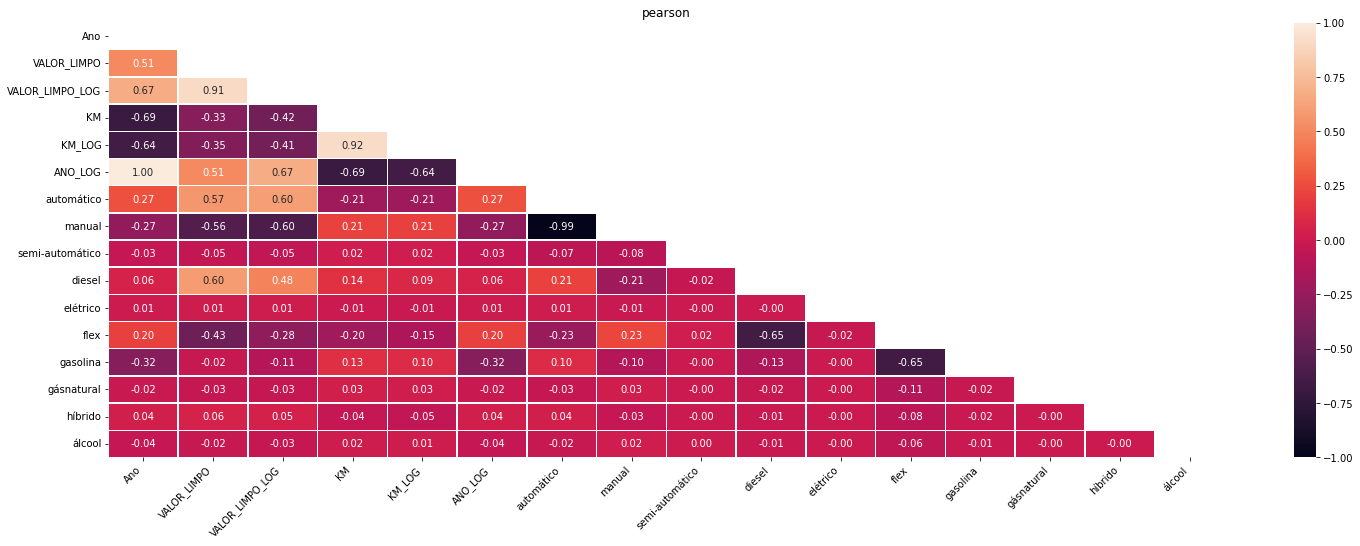

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(25, 8), sharey=False)
fig.subplots_adjust(hspace=.5, wspace=1.35)

dados    = df_metadados_final.drop(columns=['ID']).copy()
corr     = dados.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=False, fmt=".2f",linewidths=.5,ax = axs)

axs.set_title("pearson")
axs.set_xticklabels(axs.get_xticklabels(), rotation = 45,ha="right")

plt.show()